# Import and execute module code:
The module should be quite independent of the rest of qpms, so there should be now no imports therefrom.

In [10]:
import importlib
spec = importlib.util.spec_from_file_location("lattices2d", "../../qpms/lattices2d.py")
lattices2d = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lattices2d)

# Playground:

## Lattice classification
TODO convert this to regular unit tests

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
bs = 100e-9
latsiz=5
from math import sin, cos, sqrt, floor
s2 = sqrt(2)
s3 = sqrt(3)
pi = np.pi

def draw_and_classify(b1, b2):
    f, ax = plt.subplots(figsize=(6,6))
    #points = generateLattice(b1,b2, maxlayer=latsiz,include_origin=True)
    points = lattices2d.generateLatticeDisk(b1,b2,bs*latsiz, include_origin=True)
    ax.plot(points[:,0], points[:,1], 'ko-', lw=0.3)
    ax.plot((0,b1[0]), (0, b1[1]), '--', label = 'b1 input')
    ax.plot((0,b2[0]), (0, b2[1]), '--', label = 'b2 input')
    #ax.arrow(0,0,b1[0], b1[1]) # arrows seem to be broken at this scale
    #ax.arrow(0,0,b2[0], b2[1])
    
    wsc = lattices2d.cellCornersWS(b1,b2)
    codesWS = [Path.MOVETO] + (len(wsc)-1)*[Path.LINETO] + [Path.CLOSEPOLY]
    vertsWS = list(wsc) + [wsc[0]]
    vertsWSbig = list(wsc*latsiz) + [wsc[0]]
    patchWSbig = patches.PathPatch(Path(vertsWSbig, codesWS), ls='--')
    patchWS = patches.PathPatch(Path(vertsWS, codesWS), facecolor='yellow')
    ax.add_patch(patchWSbig)
    ax.add_patch(patchWS)
    

    
    altorig = (3*b1[0], 3*b1[1])
    b1, b2 = lattices2d.reduceBasisSingle(b1,b2)
    pointsWS = lattices2d.filledWS(b1,b2, density=latsiz, scale=3)+2*b1+2*b2
    pointsWS2 = lattices2d.filledWS2(b1,b2, density=latsiz, scale=3)-2*b1-2*b2
    ax.plot(pointsWS[:,0], pointsWS[:,1], 'r.')
    ax.plot(pointsWS2[:,0], pointsWS2[:,1], 'g.')
    altorig = (3*b1[0], 3*b1[1])
    b3 = (b2[0]-b1[0], b2[1]-b1[1]) # yök
    ax.plot((altorig[0],altorig[0]+b1[0]), (altorig[1], altorig[1] + b1[1]), '--', label='b1 reduced')
    ax.plot((altorig[0],altorig[0]+b2[0]), (altorig[1], altorig[1] + b2[1]), '--', label='b2 reduced')
    ax.plot((altorig[0],altorig[0]+b3[0]), (altorig[1], altorig[1] + b3[1]), '--', label='b3 reduced')
    altorig = (3*b2[0], 3*b2[1])
    if lattices2d.is_obtuse(b1,b2):
        b1, b2, b3 = lattices2d.shortestBase3(b1, b2)
        ax.plot((altorig[0],altorig[0]+b1[0]), (altorig[1], altorig[1] + b1[1]), '--', label='b1 n/o')
        ax.plot((altorig[0],altorig[0]+b2[0]), (altorig[1], altorig[1] + b2[1]), '--', label='b2 n/o')
        ax.plot((altorig[0],altorig[0]+b3[0]), (altorig[1], altorig[1] + b3[1]), '--', label='b3 n/o')
    ax.legend()
    #ax.arrow(altorig[0],altorig[1],altorig[0]+b1[0], altorig[1]+b1[1])
    #ax.arrow(altorig[0],altorig[1],altorig[0]+b2[0], altorig[1]+b2[1])
    #ax.arrow(altorig[0],altorig[1],altorig[0]+b3[0], altorig[1]+b3[1])
    ax.set_aspect('equal')
    print(lattices2d.reciprocalBasis(b1,b2))
    print(lattices2d.reduceBasisSingle(*lattices2d.reciprocalBasis(b1,b2)))
    return lattices2d.classifyLatticeSingle(b1,b2)

### Square lattices

(array([       -0.        ,  62831853.07179587]), array([-62831853.07179587,        -0.        ]))
(array([       -0.        ,  62831853.07179587]), array([-62831853.07179587,        -0.        ]))


<LatticeType.SQUARE: 4>

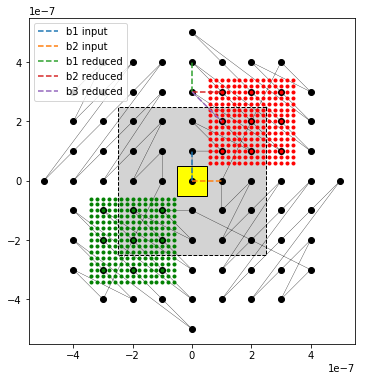

In [17]:
b1 = (0,bs)
b2 = (bs,0)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 31415926.53589794,  31415926.53589794]), array([ 31415926.53589794, -31415926.53589794]))
(array([ 31415926.53589794,  31415926.53589794]), array([ 31415926.53589794, -31415926.53589794]))


<LatticeType.SQUARE: 4>

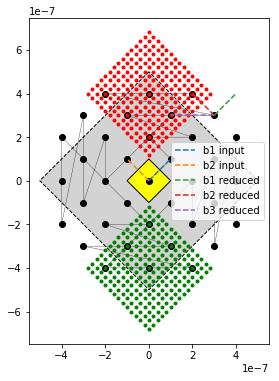

In [18]:
b1 = (bs,bs)
b2 = (-bs,bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([-47175528.98092883,  41500737.65374884]), array([-41500737.65374884, -47175528.98092883]))
(array([-47175528.98092883,  41500737.65374884]), array([-41500737.65374884, -47175528.98092883]))


<LatticeType.SQUARE: 4>

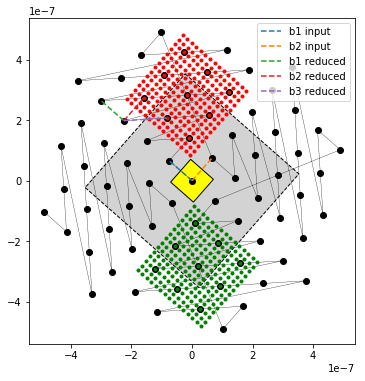

In [19]:
fi = np.random.rand() * 2*pi
b1 = (bs*sin(fi), bs*cos(fi))
b2 = (bs*cos(fi), -bs*sin(fi))
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

### Rectangular lattices

(array([       -0.        ,  62831853.07179586]), array([-57119866.42890532,        -0.        ]))
(array([-57119866.42890532,        -0.        ]), array([        0.        ,  62831853.07179586]))


<LatticeType.RECTANGULAR: 2>

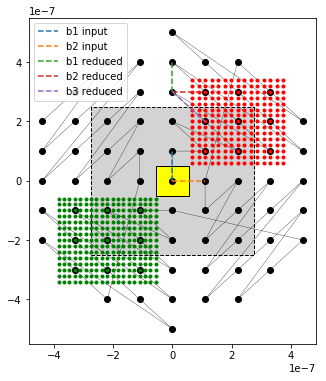

In [20]:
b1 = (0,bs)
b2 = (1.1*bs,0)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -1.57079633e+08,   1.57079633e+08]), array([-31415926.53589794, -31415926.53589794]))
(array([-31415926.53589794, -31415926.53589794]), array([ -1.57079633e+08,   1.57079633e+08]))


<LatticeType.RECTANGULAR: 2>

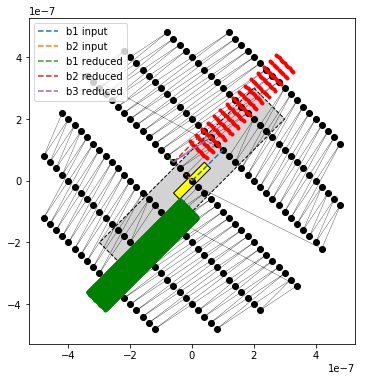

In [21]:
b1 = (bs,bs)
b2 = (-bs*.2,bs*.2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -0.00000000e+00,   6.28318531e+08]), array([ -1.57079633e+08,  -0.00000000e+00]))
(array([ -1.57079633e+08,  -0.00000000e+00]), array([  0.00000000e+00,   6.28318531e+08]))


<LatticeType.RECTANGULAR: 2>

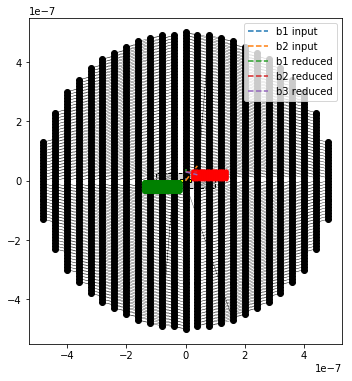

In [22]:
b1 = (0,.1*bs)
b2 = (.4*bs, .5*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 63368162.94274724, -99381921.21010759]), array([-52978582.10731646, -33780343.37205695]))
(array([-52978582.10731646, -33780343.37205695]), array([ 63368162.94274724, -99381921.21010759]))


<LatticeType.RECTANGULAR: 2>

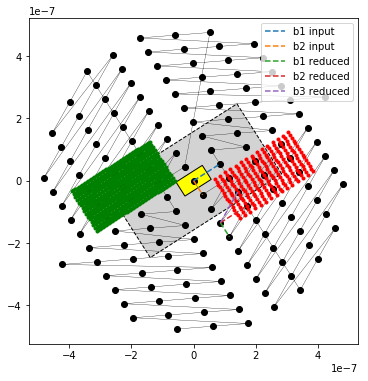

In [23]:
fi = np.random.rand() * 2*pi
fac = np.random.rand()  # For the "real" unit test, this may not be too near to one
b1 = (bs*sin(fi), bs*cos(fi))
b2 = (bs*cos(fi)*fac, -bs*sin(fi)*fac)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 63368162.94274724, -99381921.21010761]), array([-52978582.10731646, -33780343.37205695]))
(array([-52978582.10731646, -33780343.37205695]), array([ 63368162.94274724, -99381921.21010761]))


<LatticeType.RECTANGULAR: 2>

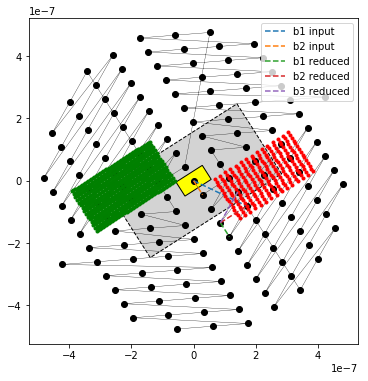

In [24]:
b1 = np.array(b1) + 3*np.array(b2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

### Equilateral triangular lattices

(array([-36275987.28468435,  62831853.07179586]), array([-72551974.56936871,        -0.        ]))
(array([-36275987.28468435,  62831853.07179586]), array([-72551974.56936871,        -0.        ]))


<LatticeType.EQUILATERAL_TRIANGULAR: 3>

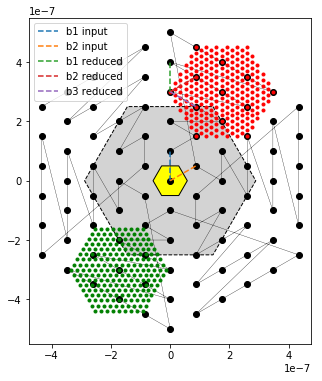

In [25]:
b1 = (0, bs)
b2 = (bs*s3/2, bs/2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 80612917.88913885, -50437274.88742136]), array([-83986420.29473524, -44594197.32147259]))
(array([ 80612917.88913885, -50437274.88742136]), array([-83986420.29473524, -44594197.32147259]))


<LatticeType.EQUILATERAL_TRIANGULAR: 3>

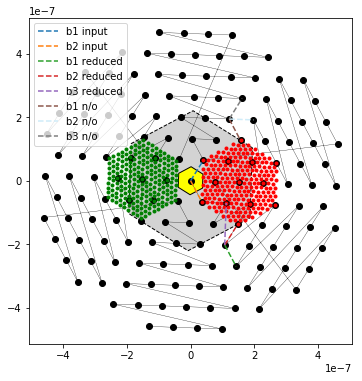

In [26]:
fi = np.random.rand() * 2*pi
fac = np.random.rand()  # For the "real" unit test, this may not be too near to one
b1 = (bs*sin(fi)*fac, bs*cos(fi)*fac)
b2 = (bs*sin(fi+2*pi/3)*fac, bs*cos(fi+2*pi/3)*fac)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ -3373502.40559637, -95031472.20889394]), array([-83986420.29473522, -44594197.32147258]))
(array([-83986420.29473522, -44594197.32147258]), array([ -3373502.40559637, -95031472.20889394]))


<LatticeType.EQUILATERAL_TRIANGULAR: 3>

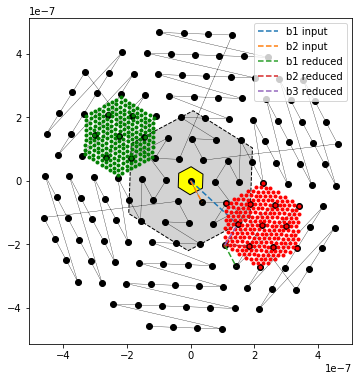

In [27]:
b1 = np.array(b1) + 3*np.array(b2)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

### Rhombic lattices

(array([-31415926.53589794,  62831853.07179587]), array([-62831853.07179587,        -0.        ]))
(array([-62831853.07179587,        -0.        ]), array([-31415926.53589794,  62831853.07179587]))


<LatticeType.RHOMBIC: 5>

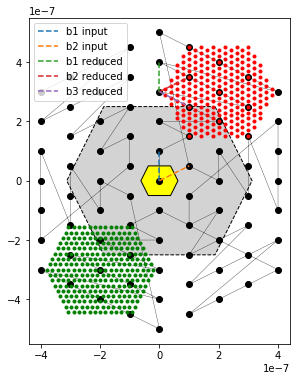

In [28]:
# case |b3| == |b2| > |b1|
b1 = (0,bs)
b2 = (bs, .5*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

(array([ 78539816.33974484,  62831853.07179587]), array([ 78539816.33974484, -62831853.07179587]))
(array([ 78539816.33974484,  62831853.07179587]), array([ 78539816.33974484, -62831853.07179587]))


<LatticeType.RHOMBIC: 5>

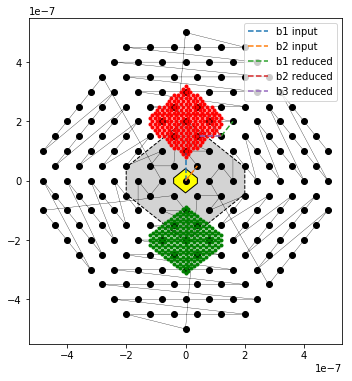

In [29]:
# case |b3| > |b2| == |b1|
b1 = (0,bs)
b2 = (.4*bs, .5*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)

In [30]:
# TODO more

### Oblique lattices

(array([  5.37997742e+07,   6.28318531e+08]), array([ -1.57079633e+08,  -0.00000000e+00]))
(array([ -1.57079633e+08,   0.00000000e+00]), array([  5.37997742e+07,   6.28318531e+08]))


<LatticeType.OBLIQUE: 1>

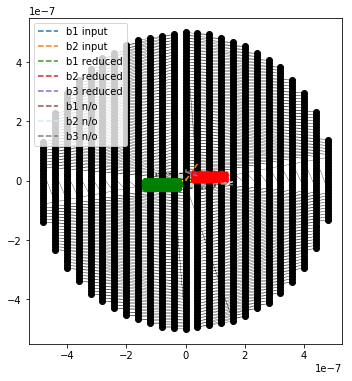

In [31]:
b1 = (0,.1*bs)
b2 = (.4*bs, .56575*bs)
#classifyLatticeSingle(b1,b2)
draw_and_classify(b1, b2)